# K-NEAREST NEIGHBORS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('training_processed.csv')
data_valid = pd.read_csv('validation_processed.csv')

labels_train = data_train['ACTIVE']# ground truth labels
features_train = data_train.drop(['ACTIVE'], axis=1) 
labels_valid = data_valid['ACTIVE']# ground truth labels
features_valid = data_valid.drop(['ACTIVE'], axis=1)

In [24]:
knn = KNeighborsClassifier()

knn_parameters = {'n_neighbors': [1, 11, 21, 31, 41, 51, 61, 71, 81]}
cross_val = KFold(n_splits=5)
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_parameters, cv=cross_val, scoring=['roc_auc','accuracy'], refit='roc_auc')
knn_grid_result = knn_grid_search.fit(features_train, labels_train)
# summarize results
print("Best: %f using %s" % (knn_grid_result.best_score_, knn_grid_result.best_params_))
print("Average AUC for Naive Bayes: ", np.mean(knn_grid_result.cv_results_['mean_test_roc_auc']))
print("Average Accuracy for Naive Bayes: ", np.mean(knn_grid_result.cv_results_['mean_test_accuracy']))

Best: 0.695866 using {'n_neighbors': 81}
Average AUC for Naive Bayes:  0.641152934494399
Average Accuracy for Naive Bayes:  0.9879628769543025


In [25]:
results = pd.DataFrame(knn_grid_result.cv_results_)

[Text(0.5, 1.0, 'ROC_AUC of K-Nearest Neighbors with K-Fold-Cross Validation\n')]

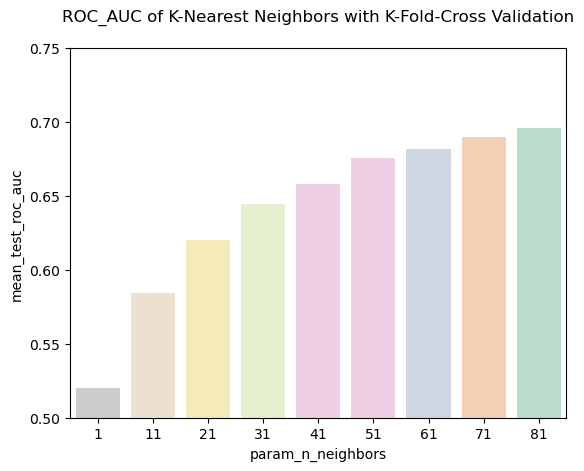

In [28]:
plot = sns.barplot(data=results, x='param_n_neighbors', y='mean_test_roc_auc', palette='Pastel2_r')
plot.set(ylim=(0.5, 0.75))
plot.set(title='ROC_AUC of K-Nearest Neighbors with K-Fold-Cross Validation\n')

[Text(0.5, 1.0, 'Accuracy of K-Nearest Neighbors with K-Fold-Cross Validation\n')]

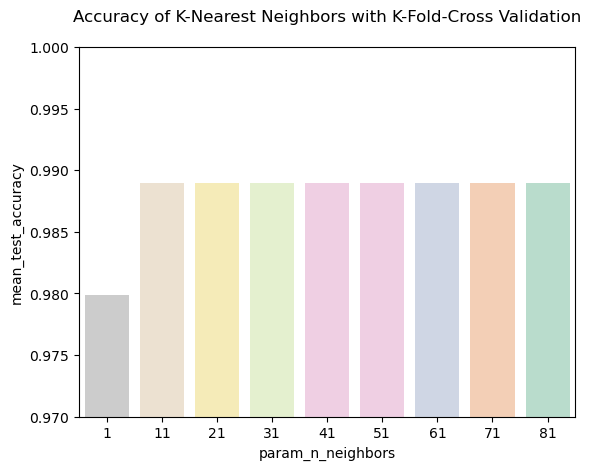

In [29]:
plot = sns.barplot(data=results, x='param_n_neighbors', y='mean_test_accuracy', palette='Pastel2_r')
plot.set(ylim=(0.97, 1))
plot.set(title='Accuracy of K-Nearest Neighbors with K-Fold-Cross Validation\n')